<a href="https://colab.research.google.com/github/haroonwaheed19/Student-Performance-Prediction-System/blob/main/Student_Performance_Prediction_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing libraries**

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import (
    mean_squared_error, mean_absolute_error, r2_score,
    classification_report, confusion_matrix, accuracy_score
)
import numpy as np

**Loading DataSet into Pandas Frame**

In [23]:
try:
    df = pd.read_csv("student-mat.csv", sep=';')
except FileNotFoundError:
    print("Error: File not found. Please check the file path.")
    exit()
except Exception as e:
    print(f"An error occurred while loading the file: {e}")
    exit()


**Data Visualization and Pre-Processing**

In [24]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [25]:
df.isnull().sum()

,0
school,0
sex,0
age,0
address,0
famsize,0
Pstatus,0
Medu,0
Fedu,0
Mjob,0
Fjob,0


In [26]:
label_encoders = {}
for column in df.select_dtypes(include=['object', 'category']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column].astype(str))
    label_encoders[column] = le


**Regression Setup Data Standarization and Data Splitting**

In [27]:
X = df.drop("G3", axis=1)
y = df["G3"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Training Linear Regression and Random Forest Regressor**

In [28]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

# Random Forest Regressor
rf = RandomForestRegressor(
    n_estimators=100,
    random_state=42,
    min_samples_leaf=5,
    max_depth=10
)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

**Regressor Model Evaluation**


--- Linear Regression ---
MSE: 5.03
RMSE: 2.24
R² Score: 0.75
MAE: 1.50

--- Random Forest Regressor ---
MSE: 3.55
RMSE: 1.88
R² Score: 0.83
MAE: 1.15


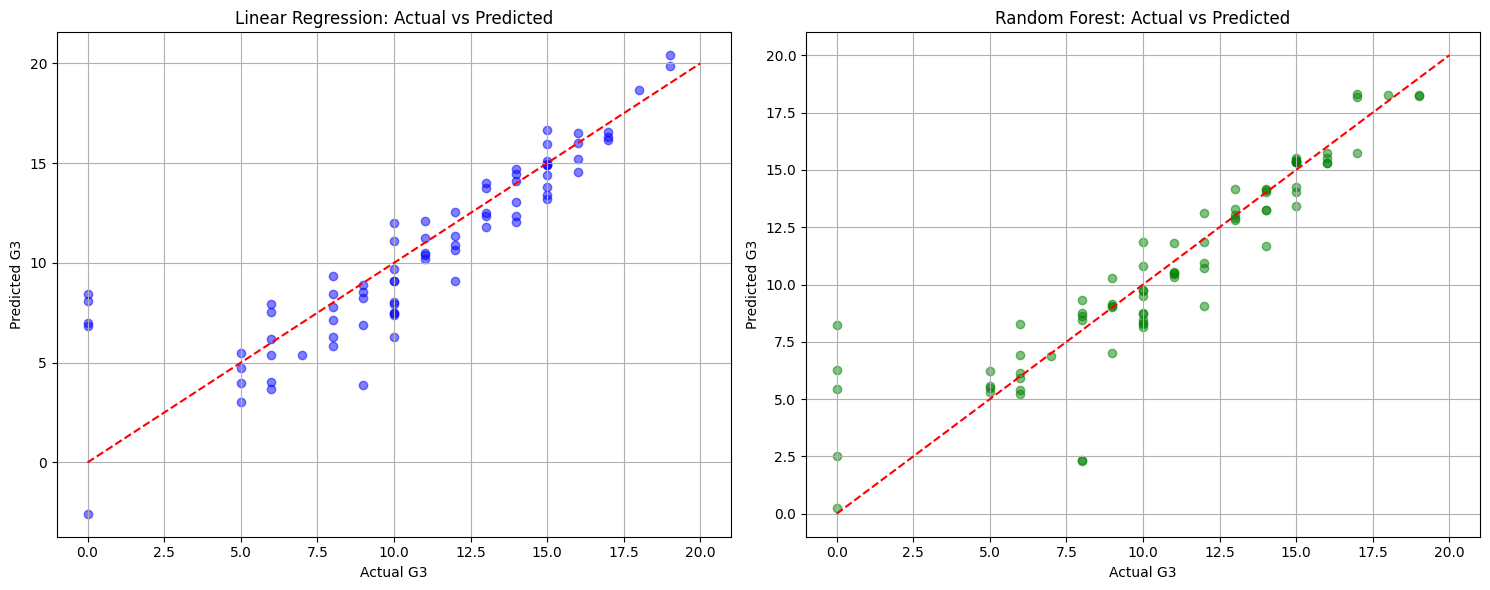

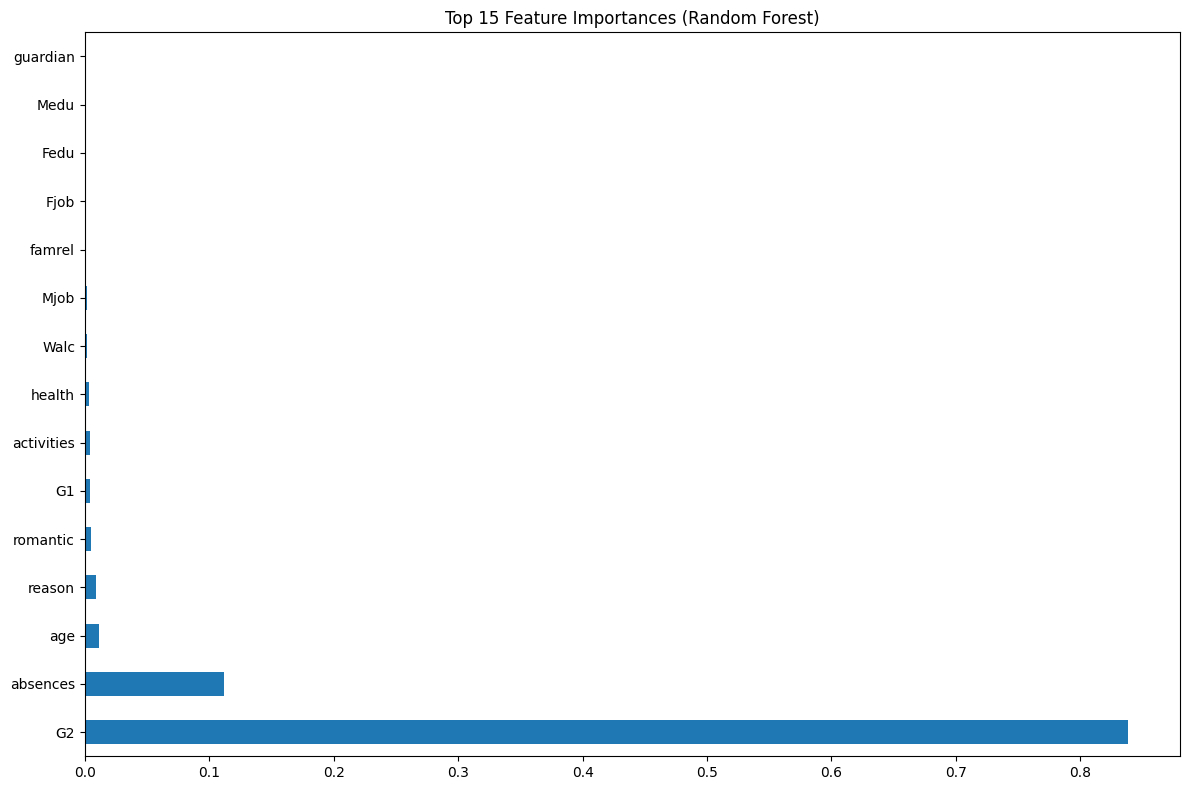

In [10]:
def evaluate_model(name, y_true, y_pred):
    print(f"\n--- {name} ---")
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R² Score: {r2_score(y_true, y_pred):.2f}")
    print(f"MAE: {mean_absolute_error(y_true, y_pred):.2f}")

evaluate_model("Linear Regression", y_test, y_pred_lr)
evaluate_model("Random Forest Regressor", y_test, y_pred_rf)

# ------------------ Regression Plots ------------------
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lr, alpha=0.5, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual G3')
plt.ylabel('Predicted G3')
plt.title('Linear Regression: Actual vs Predicted')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_rf, alpha=0.5, color='green')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual G3')
plt.ylabel('Predicted G3')
plt.title('Random Forest: Actual vs Predicted')
plt.grid(True)
plt.tight_layout()
plt.show()

# ------------------ Feature Importance ------------------
if hasattr(rf, 'feature_importances_'):
    plt.figure(figsize=(12, 8))
    feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
    feature_importances.nlargest(15).plot(kind='barh')
    plt.title('Top 15 Feature Importances (Random Forest)')
    plt.tight_layout()
    plt.show()


**Classification Model**

In [29]:
# Label: Pass (1) if G3 >= 10 else Fail (0)
df['pass'] = df['G3'].apply(lambda x: 1 if x >= 10 else 0)
X_cls = df.drop(['G3', 'pass'], axis=1)
y_cls = df['pass']

X_cls_train, X_cls_test, y_cls_train, y_cls_test = train_test_split(
    X_cls, y_cls, test_size=0.2, random_state=42
)

X_cls_train_scaled = scaler.fit_transform(X_cls_train)
X_cls_test_scaled = scaler.transform(X_cls_test)

# Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_cls_train_scaled, y_cls_train)
y_cls_pred = clf.predict(X_cls_test_scaled)

**Random Forest Classifier Evaluation**


--- Classification Report (Random Forest Classifier) ---
              precision    recall  f1-score   support

           0       0.83      0.93      0.88        27
           1       0.96      0.90      0.93        52

    accuracy                           0.91        79
   macro avg       0.90      0.91      0.90        79
weighted avg       0.92      0.91      0.91        79

Accuracy: 91.13924050632912


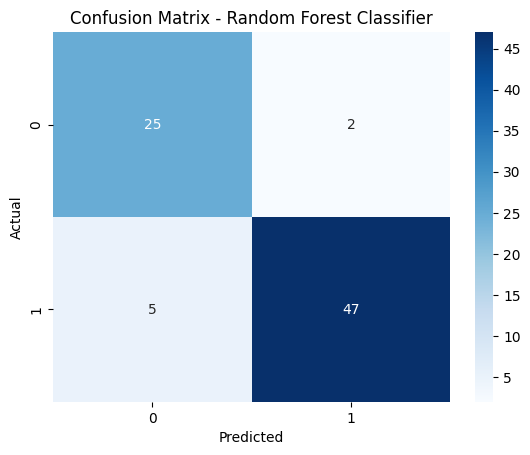

In [30]:
# Evaluation
print("\n--- Classification Report (Random Forest Classifier) ---")
print(classification_report(y_cls_test, y_cls_pred))
print("Accuracy:", accuracy_score(y_cls_test, y_cls_pred)*100)

# ------------------ Classification Confusion Matrix ------------------
cm = confusion_matrix(y_cls_test, y_cls_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest Classifier")
plt.show()


**Optimizing the Random Forest Regressor and Classifier using GridSearchCV**

In [14]:
# ------------------ GridSearchCV for Regression ------------------
print("\n--- Hyperparameter Tuning: Random Forest Regressor ---")
param_grid_rf = {
    'n_estimators': [50, 100],
    'max_depth': [5, 10, None],
    'min_samples_leaf': [1, 3, 5]
}
grid_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_rf, cv=3, scoring='neg_mean_squared_error')
grid_rf.fit(X_train_scaled, y_train)
print("Best Params:", grid_rf.best_params_)
print("Best MSE:", -grid_rf.best_score_)

# ------------------ GridSearchCV for Classification ------------------
print("\n--- Hyperparameter Tuning: Random Forest Classifier ---")
param_grid_clf = {
    'n_estimators': [50, 100],
    'max_depth': [5, 10, None],
    'min_samples_leaf': [1, 3, 5]
}
grid_clf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_clf, cv=3, scoring='accuracy')
grid_clf.fit(X_cls_train_scaled, y_cls_train)
print("Best Params:", grid_clf.best_params_)
print("Best Accuracy:", grid_clf.best_score_*100)



--- Hyperparameter Tuning: Random Forest Regressor ---
Best Params: {'max_depth': 10, 'min_samples_leaf': 3, 'n_estimators': 50}
Best MSE: 2.451569250795295

--- Hyperparameter Tuning: Random Forest Classifier ---
Best Params: {'max_depth': 10, 'min_samples_leaf': 1, 'n_estimators': 50}
Best Accuracy: 92.71937705899971


In [37]:
# ------------------ Predict G3 and Pass/Fail for New Student ------------------

# Drop G3 and pass from training columns to get correct order
drop_cols = [col for col in ["G3", "pass"] if col in df.columns]
input_features = df.drop(columns=drop_cols).columns

# Input values for new student (must match 32 columns exactly)
raw_input = [
    "GP", "F", 15, "U", "GT3", "T", 4, 2, "health", "services",
    "home", "mother", 1, 3, 0, "no", "yes", "yes", "yes", "yes",
    "yes", "yes", "yes", 3, 2, 2, 1, 1, 5, 2, 15, 14  # Includes G1 & G2
]

# Make sure length matches
assert len(raw_input) == len(input_features), f"Expected {len(input_features)} values, got {len(raw_input)}."

# Convert input into DataFrame
input_df = pd.DataFrame([raw_input], columns=input_features)

# Apply label encoding
for col in input_df.select_dtypes(include='object').columns:
    if col in label_encoders:
        input_df[col] = label_encoders[col].transform(input_df[col])
    else:
        raise ValueError(f"Missing label encoder for column: {col}")

# Convert to float
input_df = input_df.astype(float)

# Scale input
scaled_input = scaler.transform(input_df)

# Predict G3 (Regression)
predicted_g3 = rf.predict(scaled_input)[0]

# Predict Pass/Fail (Classification)
predicted_class = clf.predict(scaled_input)[0]

# Grade mapping
def get_grade(score):
    if score >= 16:
        return "A"
    elif score >= 14:
        return "B"
    elif score >= 12:
        return "C"
    elif score >= 10:
        return "D (Pass)"
    else:
        return "F (Fail)"

# ------------------ Output ------------------
print("\n🎯 Student Performance Prediction")
print(f"📊 Predicted G3 Score: {predicted_g3:.2f}")
print(f"🎓 Grade: {get_grade(predicted_g3)}")
print(f"✅ Pass/Fail: {'Pass' if predicted_class == 1 else 'Fail'}")



🎯 Student Performance Prediction
📊 Predicted G3 Score: 14.24
🎓 Grade: B
✅ Pass/Fail: Pass
